# House Prices: Advanced Regression Techniques (Kaggle)

### Objetivo: Prever o preço final de cada casa <i> (SalePrice) </i>
### Métrica: A avaliação das previsões são feitas com base no RMSE entre o logaritmo do valor previsto e o logaritmo do preço de venda observado

<i> Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data </i>

In [1]:
# Bibliotecas para manipulação dos dados
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\ju_li\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Lendo o arquivo de treinamento e teste
trainSet = pd.read_csv('train.csv')
testSet = pd.read_csv('test.csv')

df_teste = testSet.copy()

# Análise Exploratória dos Dados

### Dimensão / Tipo de Dados 

In [3]:
# Dimensão do DataFrame (1460 registros e 81 variáveis)
print("Dimensão do DataSet de Treino: ", trainSet.shape)
print("Dimensão do DataSet de Teste: ", testSet.shape)

Dimensão do DataSet de Treino:  (1460, 81)
Dimensão do DataSet de Teste:  (1459, 80)


In [4]:
trainSet.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print("Quantidade de linhas duplicadas: ", trainSet.duplicated().sum())

Quantidade de linhas duplicadas:  0


In [6]:
#trainSet.info()

### Distribuição da variável target 

Text(0.5, 1.0, 'Distribuição do SalePrice')

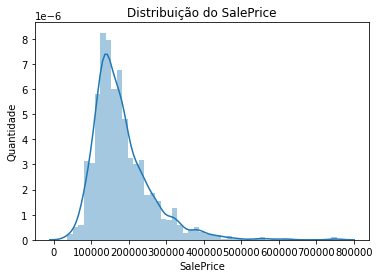

In [7]:
sns.set_color_codes(palette='dark')
sns.distplot(trainSet['SalePrice']);

#Now plot the distribution
plt.ylabel('Quantidade')
plt.title('Distribuição do SalePrice')

Como o target (SalePrice) é uma variável contínua este é um problema de regressão. Além disso, SalePrice tem uma assimetria positiva e não segue uma distribuição normal, portanto, antes de realizar a regressão, essa váriavel precisa ser normalizada. 

- > Assimetria positiva tem uma cauda do lado direito da distribuição mais longa ou mais larga. A média e a mediana serão maiores que a moda

### Análise das variáveis contínuas que possuem a maior correlação com o target <i> (SalePrice) </i>

In [8]:
# Correlação entre as variáveis e o target
corr = trainSet.corr()
corr.sort_values(['SalePrice'], ascending=False, axis=0, inplace=True)
corr[['SalePrice']].head(11)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


#### OverallQual: Classifica o material geral e o acabamento da casa (10 - Very Excellent ... 5 - Average ... 1 - Very Poor)

À medida que o "OverallQual" aumenta, o preço da casa aumenta também. Isso indica uma correlação direta e positiva entre essas duas variáveis, e o "OverallQual" parece ser um bom preditor do "SalePrice"

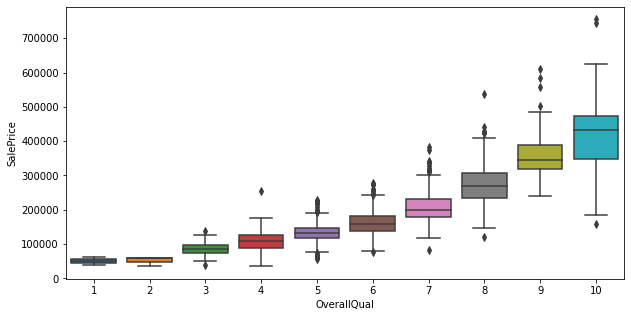

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x="OverallQual", y="SalePrice", data=trainSet)

#### GrLivArea: Área útil acima do nível do solo 

À medida que o "GrLivArea" aumenta, o preço da casa aumenta também.

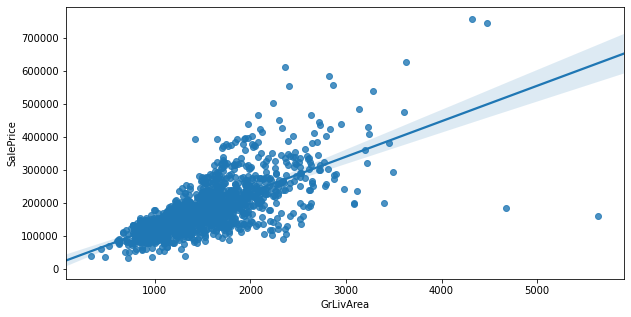

In [10]:
plt.figure(figsize=(10,5))
sns.regplot(x="GrLivArea", y="SalePrice", data=trainSet)

In [11]:
trainSet[["GrLivArea"]].describe()

,GrLivArea
count,1460.000000
mean,1515.463699
std,525.480383
min,334.000000
25%,1129.500000
50%,1464.000000
75%,1776.750000
max,5642.000000


#### GarageCars: Tamanho da garagem em capacidade do carro 
#### GarageArea: Tamanho da garagem

No 3º gráfico é possivel acompanhar como o "GarageCars" e o "GarageArea" se relacionam com o "SalePrice". Basicamente, casas que possuem uma garagem para 4 carros não interferem tanto no preço final da casa. Essa correlação com o preço só é "forte" até o tamanho 3. Além disso, a correlação entre essas duas váriaveis é bem alta (0.882475)

In [12]:
trainSet[["GarageArea", "GarageCars"]].corr()

,GarageArea,GarageCars
GarageArea,1.000000,0.882475
GarageCars,0.882475,1.000000


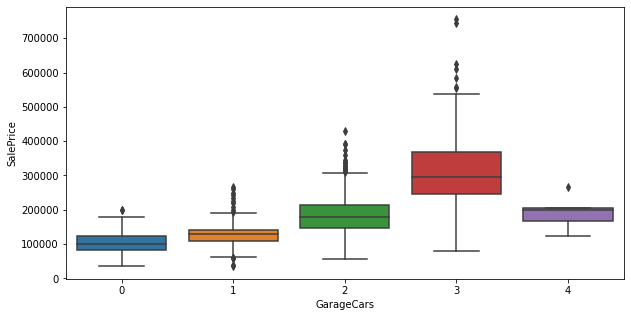

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x="GarageCars", y="SalePrice", data=trainSet)

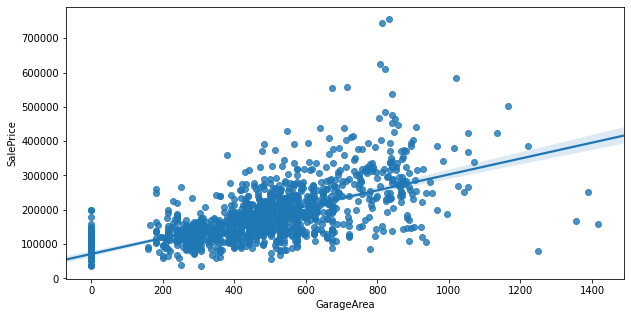

In [14]:
plt.figure(figsize=(10,5))
sns.regplot(x="GarageArea", y="SalePrice", data=trainSet)

In [15]:
trainSet[["GarageArea"]].describe()

,GarageArea
count,1460.000000
mean,472.980137
std,213.804841
min,0.000000
25%,334.500000
50%,480.000000
75%,576.000000
max,1418.000000


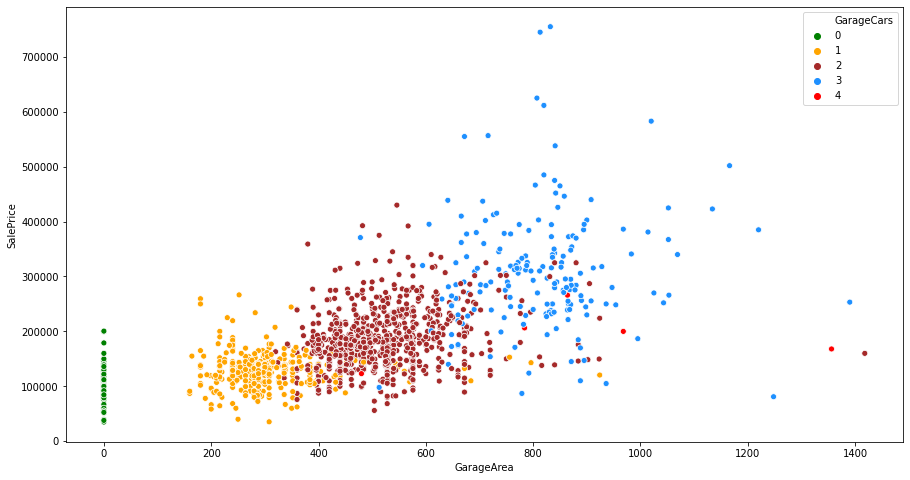

In [16]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GarageArea", y="SalePrice", hue="GarageCars",data=trainSet,palette=['green','orange','brown','dodgerblue','red'], legend='full')

#### TotalBsmtSF: Tamanho do porão

À medida que o "TotalBsmtSF" aumenta, o preço da casa aumenta também.

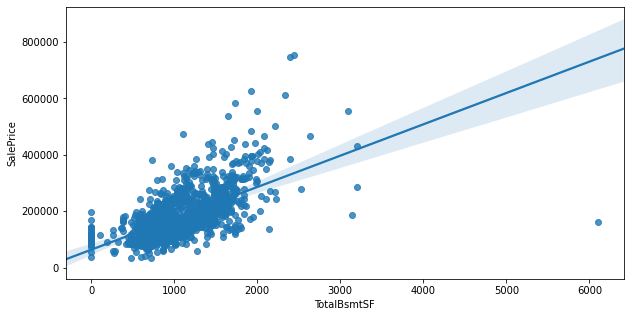

In [17]:
plt.figure(figsize=(10,5))
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=trainSet)

#### 1stFlrSF: Tamanho do primeiro andar 

À medida que o "1stFlrSF" aumenta, o preço da casa aumenta também.

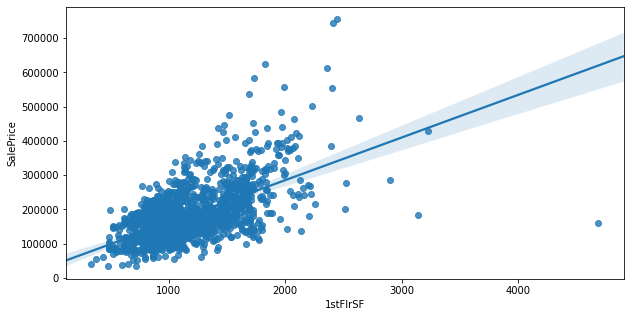

In [18]:
plt.figure(figsize=(10,5))
sns.regplot(x="1stFlrSF", y="SalePrice", data=trainSet)

#### FullBath: Quantidade de banheiros completos acima do solo (desconsiderando o porão)

À medida que o "FullBath" aumenta, o preço da casa aumenta também.

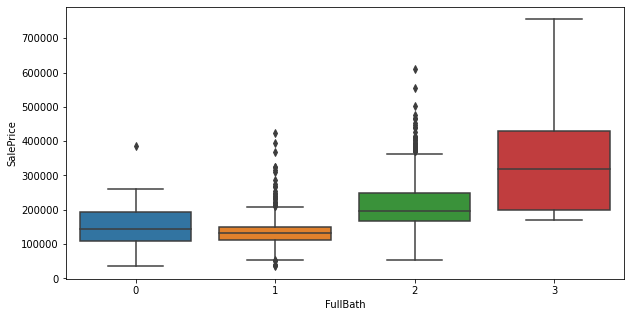

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x="FullBath", y="SalePrice", data=trainSet)

#### TotRmsAbvGrd: Quantidade de quartos acima do solo (não inclui banheiros)

À medida que o "TotRmsAbvGrd" aumenta, o preço da casa aumenta também.

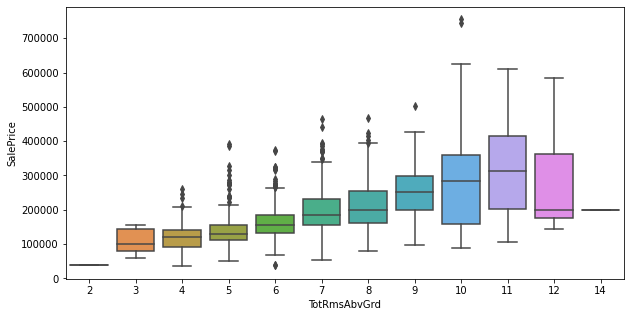

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x="TotRmsAbvGrd", y="SalePrice", data=trainSet)

#### YearBuilt: Data original da construção

Casa mais novas costumam ser mais caras

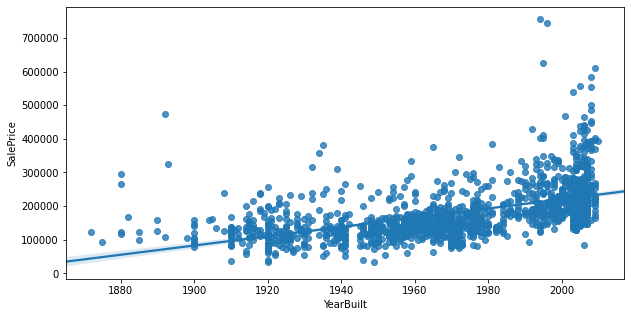

In [21]:
plt.figure(figsize=(10,5))
sns.regplot(x="YearBuilt", y="SalePrice", data=trainSet)

# DataPrep

### Missing Values

Distribuição de nulos das features do dataset de treino

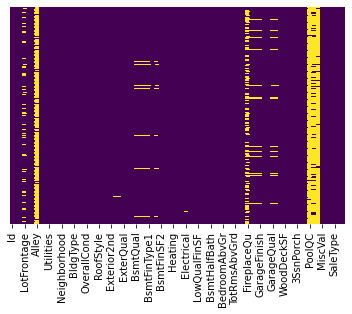

In [22]:
sns.heatmap(trainSet.isnull(),yticklabels=False,cbar=False,cmap='viridis')

% de informação nula para cada feature

In [23]:
X_NA = [(c, trainSet[c].isna().mean()*100) for c in trainSet]
X_NA = pd.DataFrame(X_NA, columns=["column_name", "percentage"])
X_NA = X_NA[X_NA.percentage > 0]
X_NA.sort_values("percentage", ascending=False)

,column_name,percentage
72,PoolQC,99.520548
74,MiscFeature,96.301370
6,Alley,93.767123
73,Fence,80.753425
57,FireplaceQu,47.260274
3,LotFrontage,17.739726
58,GarageType,5.547945
59,GarageYrBlt,5.547945
60,GarageFinish,5.547945
63,GarageQual,5.547945


In [24]:
#sns.heatmap(testSet.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Exclui do dataset todas as colunas que possuem o % de informação missing maior que 17

In [25]:
trainSet.drop(['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace=True)
testSet.drop(['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace=True)

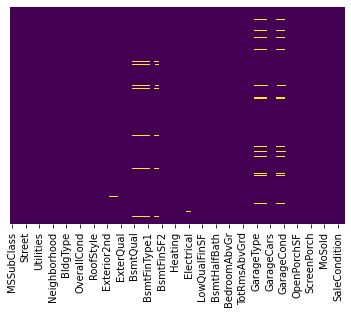

In [26]:
sns.heatmap(trainSet.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Ainda é possivel encontrar valores nulos. Nesse caso, vou aplicar a seguinte regra:
* Features númericas: substitui o nulo pela média
* Features categóricas: substitui o nulo pela moda

In [27]:
# Tratamento no treino
impute_list = trainSet.columns[trainSet.isnull().sum() > 0].array
for i in impute_list:
    if (trainSet[i].dtype=='float64'):
        trainSet[i].fillna(trainSet[i].mean() , inplace = True)
    else:
        trainSet[i].fillna(trainSet[i].mode().values[0] , inplace = True)

In [28]:
# Tratamento no teste
impute_list = testSet.columns[testSet.isnull().sum() > 0].array
for i in impute_list:
    if (testSet[i].dtype=='float64'):
        testSet[i].fillna(testSet[i].mean() , inplace = True)
    else:
        testSet[i].fillna(testSet[i].mode().values[0] , inplace = True)

In [29]:
# Dimensão do DataFrame (1460 registros e 81 variáveis)
print("Dimensão do DataSet: ", trainSet.shape)
 
# De 81 variáveis Para 74

Dimensão do DataSet:  (1460, 74)


### Aplicando o HotEncoding nas variáveis categoricas

In [30]:
trainSet.describe(exclude = [np.number])
trainSet.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [31]:
trainSet = pd.get_dummies(trainSet)
testSet = pd.get_dummies(testSet)

In [32]:
print("Nova dimensão do dataset de treino com a criação das features do HotEncoding: ", trainSet.shape)
print("Nova dimensão do dataset de teste com a criação das features do HotEncoding: ", testSet.shape)

Nova dimensão do dataset de treino com a criação das features do HotEncoding:  (1460, 270)
Nova dimensão do dataset de teste com a criação das features do HotEncoding:  (1459, 253)


### Transformação em log

Text(0.5, 1.0, 'Distribuição do SalePrice Antes')

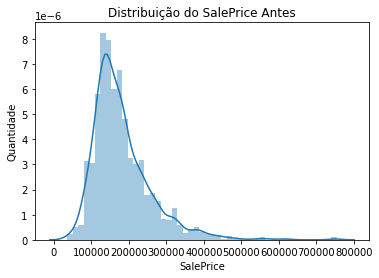

In [33]:
sns.set_color_codes(palette='dark')
sns.distplot(trainSet['SalePrice']);

#Now plot the distribution
plt.ylabel('Quantidade')
plt.title('Distribuição do SalePrice Antes')

In [34]:
trainSet['SalePrice'] = np.log1p(trainSet['SalePrice'])

Text(0.5, 1.0, 'Distribuição do SalePrice Depois da Transformação')

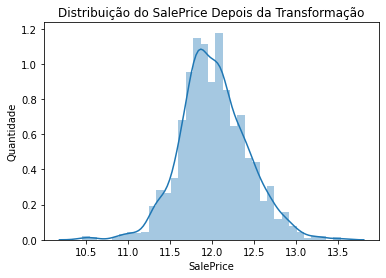

In [35]:
sns.set_color_codes(palette='dark')
sns.distplot(trainSet['SalePrice']);

#Now plot the distribution
plt.ylabel('Quantidade')
plt.title('Distribuição do SalePrice Depois da Transformação')

In [ ]:
# Correlação entre as variáveis e o target
#corr = trainSet.corr()
#corr.sort_values(['SalePrice'], ascending=False, axis=0, inplace=True)
#lista_features = corr[['SalePrice']].head(30).index.values.tolist()

Realizei a transformação de log em 36 variáveis para que elas se aproximassem de uma distribuição normal

# Treinamento

In [36]:
# Cross Validation
from sklearn.model_selection import cross_val_score

# Regressão Linear
from sklearn.linear_model import LinearRegression

# Ridge
from sklearn.linear_model import Ridge

# Lasso
from sklearn.linear_model import LassoCV

# ElasticNet
from sklearn.linear_model import ElasticNetCV

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Radom Forest
from sklearn.ensemble import RandomForestRegressor

# Avaliação do Modelo
from sklearn.metrics import mean_squared_error
from math import sqrt

# Estatística
from scipy import stats
from scipy.stats import norm, skew

## Dataset Treino e Teste

Para realizar as predições irei manter as mesmas colunas do treino e teste

In [37]:
y_train = trainSet.pop('SalePrice')
X_train = trainSet

In [38]:
X_train = X_train[testSet.columns]
print("Dimensão do DataSet de Treino: ", X_train.shape)
print("Dimensão do DataSet de Teste: ", X_train.shape)

Dimensão do DataSet de Treino:  (1460, 253)
Dimensão do DataSet de Teste:  (1460, 253)


## Cross Validation

In [40]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

## Regressão Linear Múltipla

In [41]:
model_linear = LinearRegression()
rmse_cv(model_linear).mean()

0.16721110852130394

## Ridge

In [42]:
alphas = [0.0005, 0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10,15, 20, 25, 30, 40, 50, 100, 200]

model_ridge = Ridge()
cv_ridge = []

for _alpha in alphas:
    cv_ridge.append(rmse_cv(Ridge(alpha = _alpha)).mean())

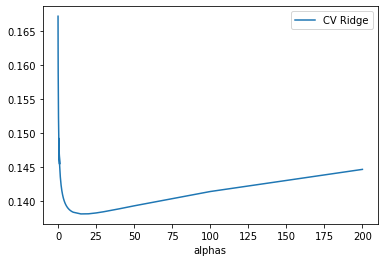

In [43]:
plt.plot(alphas, cv_ridge, label='CV Ridge')
plt.xlabel("alphas")
plt.legend()

In [44]:
pd.DataFrame.from_dict({'alphas': alphas, 'rmse': cv_ridge}).sort_values(by=['rmse']).head()

,alphas,rmse
32,15.0,0.138152
33,20.0,0.138168
34,25.0,0.138294
31,10.0,0.138399
30,9.5,0.138453


O melhor valor de alpha é 15

In [45]:
rmse_cv(model_ridge).mean()

0.1454540595862957

## Lasso

In [46]:
_alphas = [0.0005, 0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10,15, 20, 25, 30, 40, 50, 100, 200]
model_lasso = LassoCV(alphas = _alphas).fit(X_train, y_train)

In [47]:
rmse_cv(model_lasso).mean()

0.13700957457338186

In [48]:
print("Quantidade de features selecionadas: ", np.sum(model_lasso.coef_ != 0))

Quantidade de features selecionadas:  113


#### Features Selecionadas + Coeficiente


In [49]:
coef_dict = {}
for coef, feat in zip(model_lasso.coef_,X_train):
    if coef != 0:
        coef_dict[feat] = coef
coef_dict

{'MSSubClass': -0.0005093510836550534,
 'LotArea': 1.4703018850221858e-06,
 'OverallQual': 0.059251729113587774,
 'OverallCond': 0.038894222749483655,
 'YearBuilt': 0.0014797360681309297,
 'YearRemodAdd': 0.0008765677266598053,
 'MasVnrArea': -5.482457969044304e-06,
 'BsmtFinSF1': 5.35211654102453e-06,
 'BsmtFinSF2': 2.5710470400028218e-05,
 'BsmtUnfSF': 1.559848429596718e-05,
 'TotalBsmtSF': 1.068014763009197e-05,
 '1stFlrSF': 0.00018311183688625695,
 '2ndFlrSF': 0.000185968567325198,
 'LowQualFinSF': 0.00018085612100619515,
 'GrLivArea': 2.2971339321851617e-05,
 'BsmtFullBath': 0.04374418387864836,
 'BsmtHalfBath': 0.0019175222381949222,
 'FullBath': 0.027889740592627294,
 'HalfBath': 0.021025048589786804,
 'BedroomAbvGr': 0.005375407519863389,
 'KitchenAbvGr': -0.01806026312832958,
 'TotRmsAbvGrd': 0.011323561222116462,
 'Fireplaces': 0.02786160610536172,
 'GarageYrBlt': -0.0003817333602610392,
 'GarageCars': 0.056487010297510236,
 'GarageArea': 4.6130051269910355e-05,
 'WoodDeckSF'

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

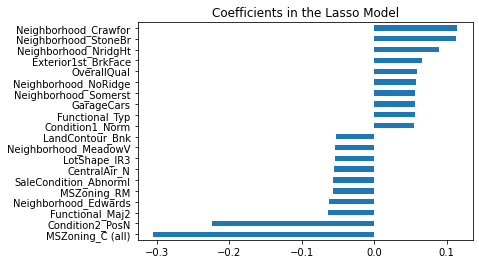

In [50]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

## Feature Selected do Lasso

In [51]:
selected_features = coef[coef!=0]
X_selected = X_train[selected_features.index]

In [52]:
def rmse_cv_feature_selected(model):
    rmse= np.sqrt(-cross_val_score(model, X_selected, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

## Regressão Linear Múltipla + Feature Selected do Lasso

In [53]:
model_linear_1 = LinearRegression()
rmse_cv_feature_selected(model_linear_1).mean()

0.13698980105038108

## Ridge + Feature Selected do Lasso

In [54]:
model_ridge_1 = Ridge()

alphas = [0.0005, 0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10,15, 20, 25, 30, 40, 50, 100, 200]
cv_ridge_1 = []
for _alpha in alphas:
    cv_ridge_1.append(rmse_cv_feature_selected(Ridge(alpha = _alpha)).mean())

rmse_cv_feature_selected(model_ridge_1).mean()

0.13298553406719807

In [55]:
pd.DataFrame.from_dict({'alphas': alphas, 'rmse': cv_ridge_1}).sort_values(by=['rmse']).head()

,alphas,rmse
19,4.0,0.131796
20,4.5,0.131802
18,3.5,0.131813
21,5.0,0.131826
22,5.5,0.131862


## ElasticNetCV

In [56]:
elastic_model = ElasticNetCV(cv=10)
rmse_cv(elastic_model).mean()

0.1982954458524175

## ElasticNetCV + Feature Selected do Lasso

In [57]:
elastic_model1 = ElasticNetCV(cv=5)
rmse_cv_feature_selected(elastic_model1).mean()

0.1982954458524175

## ElasticNetCV + Calibrando L1 & L2

In [58]:
_alphas = [0.0005, 0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10,15, 20, 25, 30, 40, 50, 100, 200]
l1_ratio = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,.1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .99, 1]
for _l1 in l1_ratio:
    model_elastic1 = ElasticNetCV(l1_ratio = _l1, alphas = _alphas, cv=5).fit(X_train, y_train)

In [59]:
score_model_elastic1 = rmse_cv(model_elastic1).mean()
score_model_elastic1

0.13725415054241402

## Decision Tree

In [60]:
def rmse_cv_dt(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 15))
    return(rmse)

In [61]:
model_decision_tree1 = DecisionTreeRegressor()
rmse_cv_dt(model_decision_tree1).mean()

0.1962101884393786

#### max_depth -> A profundidade máxima da árvore

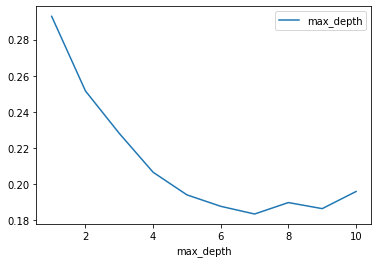

In [62]:
n = [1,2,3,4,5,6,7,8,9,10]

cv_dte = []

for _n in n:
    cv_dte.append(rmse_cv_dt(DecisionTreeRegressor(max_depth = _n)).mean())
    
plt.plot(n, cv_dte, label='max_depth')
plt.xlabel("max_depth")
plt.legend()   

In [63]:
model_decision_tree1 = DecisionTreeRegressor(max_depth=6)
rmse_cv_dt(model_decision_tree1).mean()

0.1872058085856709

#### min_samples_split -> O número mínimo de amostras necessárias para dividir um nó interno

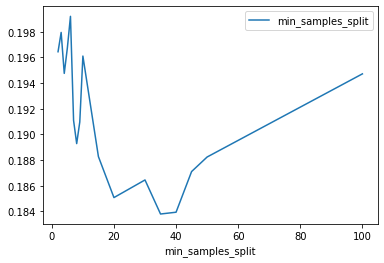

In [64]:
n = [2,3,4,5,6,7,8,9,10,15,20,30,35,40,45,50,100]

dt2 = DecisionTreeRegressor()
cv_dte = []

for _n in n:
    cv_dte.append(rmse_cv_dt(DecisionTreeRegressor(min_samples_split = _n)).mean())
    
plt.plot(n, cv_dte, label='min_samples_split')
plt.xlabel("min_samples_split")
plt.legend()

In [65]:
model_decision_tree1 = DecisionTreeRegressor(min_samples_split=30)
rmse_cv_dt(model_decision_tree1).mean()

0.18607318553756105

#### min_samples_leaf -> O número mínimo de amostras necessárias para estar em um nó folha 

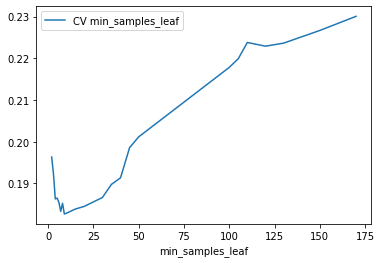

In [66]:
n = [2,3,4,5,6,7,8,9,10,15,20,30,35,40,45,50,100,105,110,120,130,150,170]

cv_dte = []

for _n in n:
    cv_dte.append(rmse_cv_dt(DecisionTreeRegressor(min_samples_leaf = _n)).mean())
    
plt.plot(n, cv_dte, label='CV min_samples_leaf')
plt.xlabel("min_samples_leaf")
plt.legend() 

In [67]:
model_decision_tree1 = DecisionTreeRegressor(min_samples_leaf=5)
rmse_cv_dt(model_decision_tree1).mean()

0.18673299630178528

#### max_features -> O número maximo de features

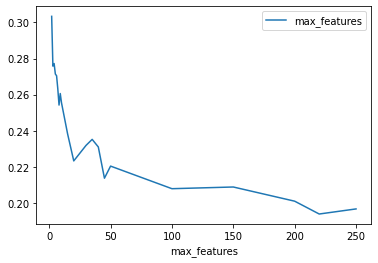

In [68]:
n = [2,3,4,5,6,7,8,9,10,15,20,30,35,40,45,50,100,150,200,220,250]

cv_dte = []

for _n in n:
    cv_dte.append(rmse_cv_dt(DecisionTreeRegressor(max_features = _n)).mean())
    
plt.plot(n, cv_dte, label='max_features')
plt.xlabel("max_features")
plt.legend() 

In [69]:
model_decision_tree1 = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=30, max_depth=6, max_features=250)
rmse_cv_dt(model_decision_tree1).mean()

0.18762746925350082

## Random Forest Regressor


In [76]:
regr_forest = RandomForestRegressor(n_estimators = 100)
rmse_cv_dt(regr_forest).mean()

0.1402889405630601

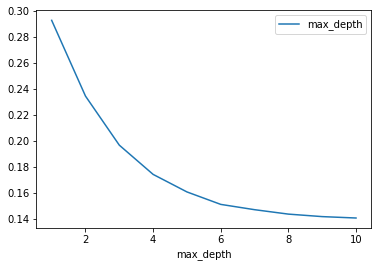

In [77]:
n = [1,2,3,4,5,6,7,8,9,10]

cv_dte = []

for _n in n:
    cv_dte.append(rmse_cv_dt(RandomForestRegressor(max_depth = _n, n_estimators = 100)).mean())
    
plt.plot(n, cv_dte, label='max_depth')
plt.xlabel("max_depth")
plt.legend()  

In [78]:
regr_forest2 = RandomForestRegressor(n_estimators = 100, max_depth=10)
rmse_cv_dt(regr_forest2).mean()

0.14091447742319604

# Desempenho dos modelos

In [79]:
df_scores = pd.DataFrame(

    [["Regressão Linear Múltipla",rmse_cv(model_linear).mean()],
    ["Ridge",rmse_cv(model_ridge).mean()],
    ["Lasso",rmse_cv(model_lasso).mean()],
    ["Regressão Linear Múltipla - Feature Selected",rmse_cv_feature_selected(model_linear_1).mean()],
    ["Ridge - Feature Selected", rmse_cv_feature_selected(model_ridge_1).mean()],
    ["ElasticNetCV", rmse_cv(elastic_model).mean()],
    ["ElasticNetCV - Feature Selected", rmse_cv_feature_selected(elastic_model1).mean()],
    ["ElasticNetCV + Calibrando L1 & L2", score_model_elastic1],
    ["Decision Tree Regressor", rmse_cv_dt(model_decision_tree1).mean()],
    ["Decision Tree Regressor - min_samples_split=45", rmse_cv_dt(model_decision_tree1).mean()],
    ["Random Forest Regressor", rmse_cv_dt(regr_forest).mean()],
    ["Random Forest Regressor - max_depth=10", rmse_cv_dt(regr_forest2).mean()]
    ],

    columns=['Modelo', 'RMSE'])

df_scores.sort_values(by=['RMSE'])

,Modelo,RMSE
4,Ridge - Feature Selected,0.132986
3,Regressão Linear Múltipla - Feature Selected,0.136990
2,Lasso,0.137010
7,ElasticNetCV + Calibrando L1 & L2,0.137254
10,Random Forest Regressor,0.139200
11,Random Forest Regressor - max_depth=10,0.140043
1,Ridge,0.145454
0,Regressão Linear Múltipla,0.167211
8,Decision Tree Regressor,0.186686
9,Decision Tree Regressor - min_samples_split=45,0.186810


#### O modelo com o melhor desempenho foi o Rigde com o feature selected do Lasso 

In [71]:
best_model = Ridge(alpha = 4)

best_model.fit(X_train[X_selected.columns], y_train)

best_model_pred = best_model.predict(testSet[X_selected.columns])

In [74]:
submission = pd.DataFrame({'Id': df_teste.Id, 'SalePrice': np.expm1(best_model_pred)})
submission.to_csv('Ridge_feature_selected.csv', index=False)
submission.shape

(1459, 2)

### O modelo teve uma boa generalização. No final o score do kaggle foi de 0.13553, muito parecido com o resultado do treinamento que foi 0.132986